In [1]:
import pandas as pd

# Rutas a los archivos CSV
archivo_reflectancias = "..\\datos\\base_de_datos_gis.csv"  # contiene: fecha,punto,pixel,banda,reflect,longitud,latitud
archivo_parametros = "..\\datos\\base_de_datos_lab.csv"     # contiene: fecha,longitud,latitud,param,valor

# Leer los archivos
df_reflect = pd.read_csv(archivo_reflectancias)
df_param = pd.read_csv(archivo_parametros)

# Filtrar los parámetros "secchi"
df_secchi = df_param[df_param["param"].str.lower() == "secchi"]

# Merge por fecha y coordenadas
merged = pd.merge(
    df_secchi,
    df_reflect,
    on=["fecha", "latitud", "longitud"],
    how="inner"
)

# Pivotear la tabla para poner bandas como columnas
tabla_final = merged.pivot_table(
    index=["param", "fecha", "longitud", "latitud", "valor"], 
    columns="banda",
    values="reflect"
).reset_index()

# Reordenar columnas: param | B01 | B02 | ... | B8A
bandas = ['B01', 'B02', 'B03', 'B04', 'B05', 'B06', 'B07', 'B08', 'B11', 'B12', 'B8A']
columnas_finales = ['valor'] + bandas

# Crear Tabla final
df = tabla_final[columnas_finales]
X = df.drop(columns='valor')
y = df['valor']

In [2]:
import sys
sys.path.append("..//scripts")  # only if your .py is not in the same folder
from machine_learning import *

Fitting 3 folds for each of 864 candidates, totalling 2592 fits


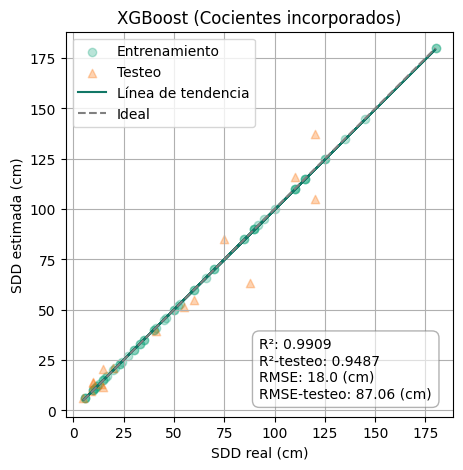

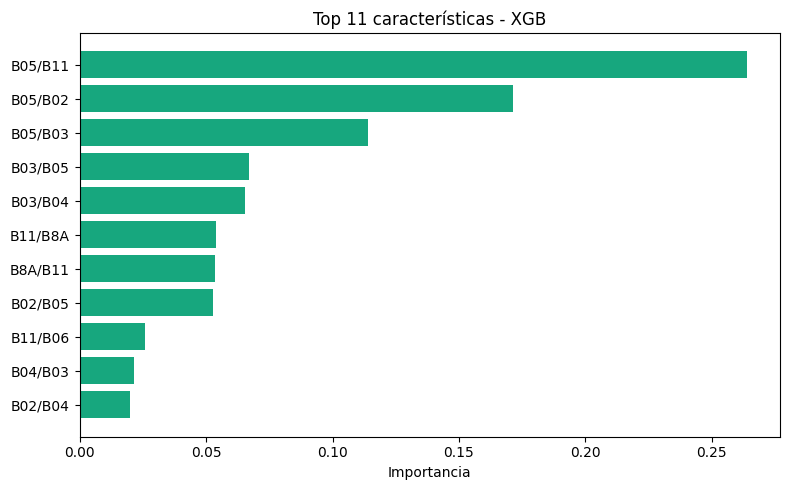

In [3]:
Modelo = RegresionML(X,y, ratios = True)
Modelo.train_xgb()
Modelo.graficar(model = "xgb")
Modelo.graficar_importancia(model="xgb", top_n=11)

In [8]:
import pickle

with open('C://Users//mauri//OneDrive//Desktop//PARANA//sitio_secchi//modelos_ml//rf_251014_0.9423_0.8823.pkl', 'rb') as f:
    data = pickle.load(f)

print(type(data))
print(data)


<class 'numpy.ndarray'>
['B01' 'B02' 'B03' 'B04' 'B05' 'B06' 'B07' 'B08' 'B11' 'B12' 'B8A']
